## Exer 1.1: PCA: 2-dimensional Toy Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### part (a) 
Load the dataset pca-data-2d.dat and create a scatter plot of the centered data.

In [2]:
data = []
with open('pca-data-2d.dat', 'r') as f:
    lines = f.readlines()
    for line in lines:
        k = line.rstrip().split()
        data.append([float(d) for d in k])
        
data = np.array(data)


In [3]:
c_data = data - np.mean(data,axis=0)
c_data

array([[ 0.49, -0.69],
       [-1.21,  1.31],
       [ 0.99, -0.39],
       [ 0.29, -0.09],
       [ 1.09, -1.29],
       [ 0.79, -0.49],
       [-0.31, -0.19],
       [-0.81,  0.81],
       [-0.31,  0.31],
       [-1.01,  0.71]])

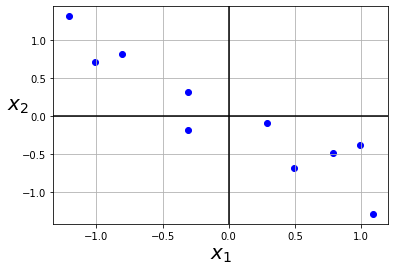

In [4]:
plt.scatter(c_data[:,0], c_data[:,1],color = 'b')
plt.grid()
plt.xlabel(r'$x_1$', fontsize=20);
plt.ylabel(r'$x_2$', fontsize=20, rotation='horizontal');
plt.axhline(0, color='black');
plt.axvline(0, color='black');

### part (b)
Determine the Principal Components (PCs) and create another scatter plot of the same data points in the coordinate system spanned by the 2 PCs.

In [5]:
# Standardize data
c_data = c_data/np.std(c_data,axis=0)

In [6]:
# Cov matrix
cov_data = np.cov(c_data.T)
cov_data

array([[ 1.11111111, -1.0288103 ],
       [-1.0288103 ,  1.11111111]])

In [7]:
# Eigendecomposition
eigen_val, eigen_vec = np.linalg.eig(cov_data)
print('eigenvalue :\n', eigen_val)
print('\neigenvector :\n', eigen_vec)

eigenvalue :
 [2.13992141 0.08230081]

eigenvector :
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [8]:
print('PC1 explains', round(eigen_val[0]/sum(eigen_val)*100), '% of the data')

PC1 explains 96 % of the data


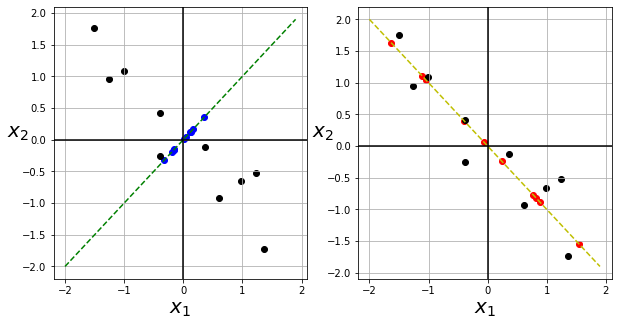

In [16]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
colors = ['b', 'r']
plot_colors = ['g--','y--']

for j in range(2):
    # project  
    a = c_data.dot(eigen_vec[j])
    e = eigen_vec[j][:,np.newaxis]
    x = (a * e).T
    
    plt.sca(axs[j])
    plt.scatter(x[:,0], x[:,1],color = colors[j])
    plt.scatter(c_data[:,0], c_data[:,1],color = 'k')
    plt.grid()
    
    plt.xlabel(r'$x_1$', fontsize=20);
    plt.ylabel(r'$x_2$', fontsize=20, rotation='horizontal');
    
    h = np.arange(-2,2,.1)
    i = eigen_vec[j][1]/eigen_vec[j][0]
    plt.plot(h, i*h,plot_colors[j])
    
    plt.axvline(0, color='black');
    plt.axhline(0, color='black');

In [10]:
# rotate whole data
# create rotation matrix
theta = np.arctan2(eigen_vec[0][1],eigen_vec[0][0])

r = np.array(( (np.cos(theta), -np.sin(theta)),
               (np.sin(theta),  np.cos(theta)) ))

In [11]:
# projection data
# z3 = a1 * e1
#    = <e1,x> * e1

z3 = (c_data.dot(eigen_vec[0]) * eigen_vec[0][:,np.newaxis]).T
z4 = (c_data.dot(eigen_vec[1]) * eigen_vec[1][:,np.newaxis]).T

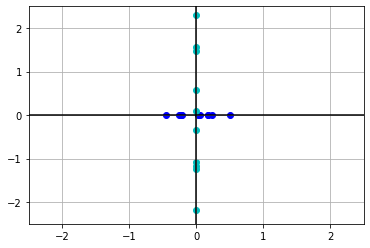

In [12]:
a1 = z3 @ r
a2 = z4 @ r

plt.scatter(a1[:,0], a1[:,1],color = 'b')
plt.scatter(a2[:,0], a2[:,1],color = 'c')
axes = plt.gca()
axes.set_xlim([-2.5,2.5])
axes.set_ylim([-2.5,2.5])
plt.grid()
plt.axvline(0, color='black');
plt.axhline(0, color='black');

In [13]:
# plt.figure(figsize=(7,7))
# plt.scatter(z3[:,0], z3[:,1],color = 'c')
# plt.scatter(z4[:,0], z4[:,1],color = 'r')
# plt.scatter(c_data[:,0], c_data[:,1],color = 'k')
# plt.grid()
# plt.xlabel(r'$x_1$', fontsize=20);
# plt.ylabel(r'$x_2$', fontsize=20, rotation='horizontal');
# plt.axhline(0, color='black');
# plt.axvline(0, color='black');
# x_val = [0, eigen_vec[0][0]]
# y_val = [0, eigen_vec[0][1]]

# x = np.arange(-2,2,.1)
# i = eigen_vec[0][1]/eigen_vec[0][0]
# plt.plot(x, i*x,'g--')
# i = eigen_vec[1][1]/eigen_vec[1][0]
# plt.plot(x, i*x,'y--')

### part (c) 
PCA can be used to compress data e.g. using only information contained in the first M out of N PCs. Plot the reconstruction of the data in the original coordinate system when using
(i) only the first or (ii) only the second PC for reconstruction.

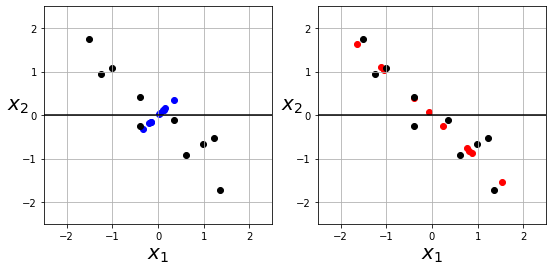

In [15]:
fig, axs = plt.subplots(1,2,figsize=(9,4))
colors = ['b', 'r']
for j in range(2):
    # reconstruction x = a1*e1 + a2*e2
    a = c_data.dot(eigen_vec[j])
    e = eigen_vec[j][:,np.newaxis]
    x = (a * e).T
    
    plt.sca(axs[j])
    plt.scatter(x[:,0], x[:,1],color = colors[j])
    plt.scatter(c_data[:,0], c_data[:,1],color = 'k')
    
    plt.xlabel(r'$x_1$', fontsize=20);
    plt.ylabel(r'$x_2$', fontsize=20, rotation='horizontal');
    plt.axhline(0, color='black');
    plt.grid()
    axes = plt.gca()
    axes.set_xlim([-2.5,2.5])
    axes.set_ylim([-2.5,2.5])